# ***IMAGE CLASSIFICATION***

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
import cv2
import imghdr
from PIL import Image

#DATASET


# 1.   DATA COLLECTION

1.   The data has been collected in a total of 4 classes which are animals,   humans,plants and non-living things.
2.   A total of 1278 images have been manually or collected from google images 320 approximately from each class.

# 2. DATA PREPROCESSING  


1.   Data Cleaning : The images which are duplicate or not of the necessary format are removed.
2.   All the images are then converted to jpg, renamed in an order and then reduced to same size 32x32 pixels to help improve the accuracy.

# 3. DATA AUGMENTATION

1. Data augmentation is widely used in computer vision tasks, such as image classification, object detection ,segmentation etc.
2. This process implements a data augmentation technique namely flipping which involves mirroring the image horizontally or vertically or both.














In [32]:
data_dir = 'dataset' #THE DATASET IS AVAILABLE ON THE GITHUB PAGE, CHANGE THE FILE PATH ACCORDING TO YOUR LOCAL HOST

In [33]:
image_exts = ['jpeg', 'jpg', 'png']

In [34]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [35]:
data=[]
labels=[]

In [36]:
augmentation_enabled = True
num_augmented_images_per_original = 3

def augment_image(img):
    augmented_images = [img]
    if augmentation_enabled:
        augmented_images.append(cv2.flip(img, 1))
        augmented_images.append(cv2.flip(img, 0))
    return augmented_images

classes = os.listdir(data_dir)

for class_label in classes:
    class_path = os.path.join(data_dir, class_label)
    image_files = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(".jpg") or img.endswith(".jpeg")]

    for image_file in image_files:
        img = cv2.imread(image_file)
        img = cv2.resize(img, (32, 32))
        data.append(img)
        labels.append(class_label)

        if augmentation_enabled:
            augmented_images = augment_image(img)
            for augmented_img in augmented_images:
                data.append(augmented_img)
                labels.append(class_label)
                augmentation_enabled = True
num_augmented_images_per_original = 3

# **SPLITTING THE DATA INTO TRAINING DATASET AND TESTING DATASET**

In [37]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [38]:
x_train=np.array(train_data)
x_test=np.array(test_data)
y_train=np.array(train_labels,dtype='uint8')
y_test=np.array(test_labels,dtype='uint8')
print(x_train.shape)
x_test.shape

(4076, 32, 32, 3)


(1020, 32, 32, 3)

In [39]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]
y_test[:5]

array([0, 2, 0, 2, 0], dtype=uint8)

In [40]:
lclasses = ["Animals","Humans","Plants","Non-Liv"]

In [41]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index],cmap='gray')
    plt.xlabel(lclasses[y[index]])


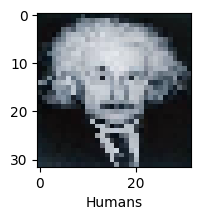

In [42]:
plot_sample(x_train, y_train, 1018)

# **NORMALIZING THE DATASET**
Normalizing a dataset is a data preprocessing technique used to rescale the values of numerical features within a specific range, typically between 0 and 1 or -1 and 1. Normalization is performed to ensure that all features contribute equally to the analysis and that differences in the scale of features do not unduly influence machine learning algorithms. It is particularly important for algorithms that are sensitive to the scale of input data, such as gradient-based optimization algorithms used in deep learning and some distance-based algorithms.

In [43]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# **THE IMAGE CLASSIFICATION MODEL**

1.   **ARTIFICAL NEURAL NETWORK (ANN)**
2.   **CONVOLUTIONAL NEURAL NETWROK(CNN)**



# **1. ARTIFICIAL NEURAL NETWORK MODEL**

In [44]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



ann_history = ann.fit(x_train, y_train, batch_size= 32,epochs=20)

Epoch 1/20


128/128 [==============================] - 5s 34ms/step - loss: 1.4248 - accuracy: 0.3562
Epoch 2/20
128/128 [==============================] - 4s 34ms/step - loss: 1.2004 - accuracy: 0.4686
Epoch 3/20
128/128 [==============================] - 4s 33ms/step - loss: 1.1167 - accuracy: 0.5191
Epoch 4/20
128/128 [==============================] - 4s 33ms/step - loss: 1.0455 - accuracy: 0.5805
Epoch 5/20
128/128 [==============================] - 4s 33ms/step - loss: 0.9934 - accuracy: 0.6087
Epoch 6/20
128/128 [==============================] - 4s 33ms/step - loss: 0.9291 - accuracy: 0.6614
Epoch 7/20
128/128 [==============================] - 4s 33ms/step - loss: 0.9001 - accuracy: 0.6705
Epoch 8/20
128/128 [==============================] - 4s 33ms/step - loss: 0.8588 - accuracy: 0.6911
Epoch 9/20
128/128 [==============================] - 4s 33ms/step - loss: 0.8142 - accuracy: 0.7107
Epoch 10/20
128/128 [==============================] - 4s 33ms/step - loss: 0.7904 - accuracy: 0.7188


# **2. CONVOLUTIONAL NEURAL NETWORK MODEL**

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

cnn = keras.Sequential()

cnn.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (2, 2), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(128, activation='relu'))

cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_2 (Conv2D)           (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               401536    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
          

In [46]:
cnn_hist = cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
128/128 [==============================] - 2s 11ms/step - loss: 1.1301 - accuracy: 0.5132
Epoch 2/20
128/128 [==============================] - 1s 10ms/step - loss: 0.8317 - accuracy: 0.6899
Epoch 3/20
128/128 [==============================] - 1s 11ms/step - loss: 0.7219 - accuracy: 0.7363
Epoch 4/20
128/128 [==============================] - 1s 11ms/step - loss: 0.6262 - accuracy: 0.7706
Epoch 5/20
128/128 [==============================] - 1s 11ms/step - loss: 0.5616 - accuracy: 0.8045
Epoch 6/20
128/128 [==============================] - 1s 11ms/step - loss: 0.4907 - accuracy: 0.8292
Epoch 7/20
128/128 [==============================] - 1s 11ms/step - loss: 0.4187 - accuracy: 0.8553
Epoch 8/20
128/128 [==============================] - 1s 11ms/step - loss: 0.4057 - accuracy: 0.8550
Epoch 9/20
128/128 [==============================] - 2s 12ms/step - loss: 0.3205 - accuracy: 0.8950
Epoch 10/20
128/128 [==============================] - 2s 12ms/step - loss: 0.2628 - accura

# **TRAINING ACCURACY AND REPRESENTING SOME RELEVANT GRAPHS**

In [47]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(x_test, y_test)
print(cnn_test_accuracy*100, "%")

32/32 [==============================] - 0s 4ms/step - loss: 0.5551 - accuracy: 0.8647
86.47058606147766 %


In [48]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test)

print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

32/32 [==============================] - 0s 8ms/step - loss: 0.7467 - accuracy: 0.7333
Test Loss :  0.746696949005127
Test Accuracy :  0.7333333492279053


Test Loss: 0.746696949005127
Test Accuracy: 73.33333492279053 %


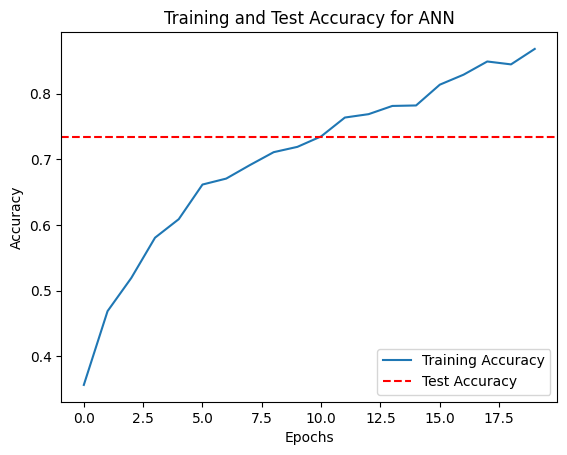

In [49]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy*100, "%")

plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy for ANN')

plt.show()

99.70559477806091


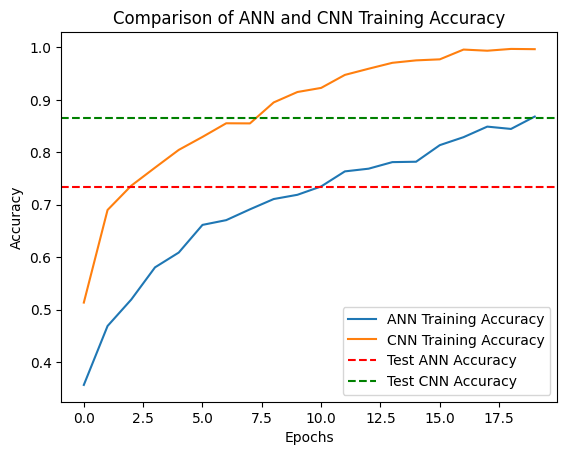

In [50]:
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(cnn_hist.history['accuracy'], label='CNN Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test ANN Accuracy')
plt.axhline(y=cnn_test_accuracy, color='g', linestyle='--', label='Test CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Comparison of ANN and CNN Training Accuracy')

print(max(cnn_hist.history['accuracy']) * 100)
plt.show()

In [51]:
# model_5_epochs = ann.fit(x_train, y_train, epochs=5)
# print("Trained for 5 epochs")
# model_20_epochs = ann.fit(x_train, y_train, epochs=20)
# print("Trained for 20 epochs")
# plt.plot(model_5_epochs.history['accuracy'], label='5 Epochs')
# plt.plot(model_20_epochs.history['accuracy'], label='20 Epochs')

# plt.title('Model Accuracy Comparison')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

# max_acc_5_epochs = max(model_5_epochs.history['accuracy'])
# max_acc_20_epochs = max(model_20_epochs.history['accuracy'])
# print("Maximum accuracy for 5 epochs : ", max_acc_5_epochs*100, " %")
# print("Maximum accuracy for 20 epochs : ", max_acc_20_epochs*100, " %")


# **TESTING OUR TESTING DATASET**

In [52]:
y_pred = cnn.predict(x_test)
y_pred[:5]


32/32 [==============================] - 0s 4ms/step


array([[9.94973898e-01, 2.71374616e-03, 3.07945738e-04, 2.00447091e-03,
        8.62214328e-11, 6.79242704e-11, 3.57316399e-11, 7.50275883e-11,
        1.42259199e-11, 1.25264715e-10],
       [8.87429953e-01, 9.75386456e-07, 1.12569019e-01, 1.12104267e-07,
        1.74294292e-12, 9.76688457e-13, 5.04227649e-12, 6.11711810e-12,
        9.86991589e-14, 1.00553055e-11],
       [9.91220891e-01, 4.52144956e-03, 4.25559562e-03, 2.10699886e-06,
        7.57563109e-11, 3.22943283e-10, 2.02246220e-10, 1.60479532e-10,
        5.36484086e-11, 7.59281971e-10],
       [1.77201287e-06, 3.81634191e-09, 9.99994755e-01, 3.45287935e-06,
        8.71559464e-15, 1.69956303e-15, 9.40039537e-15, 4.81496455e-14,
        2.58977359e-16, 3.83303720e-14],
       [6.79597184e-02, 1.54128395e-06, 9.32038248e-01, 5.10679172e-07,
        1.35655734e-12, 2.13671377e-12, 4.87750682e-12, 6.71418086e-12,
        8.88652623e-14, 7.57237589e-12]], dtype=float32)

In [53]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 2, 2]

In [54]:
y_test[:5]

array([0, 2, 0, 2, 0], dtype=uint8)

0


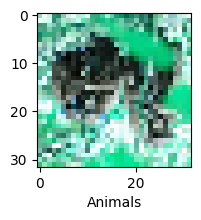

In [55]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

In [56]:
classes[y_classes[3]]

'2'

1


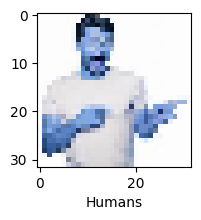

In [57]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

3


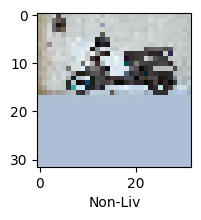

In [58]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

2


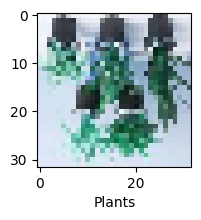

In [59]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

1


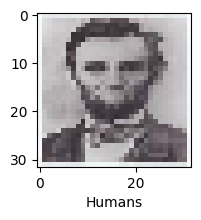

In [60]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)